# **Reduction de Dimension : MCA**

#### To use mca in a project:
- import mca
- mca_df = mca.MCA(dataframe[, cols=None][, ncols=None][, benzecri=True][, TOL=1e-4])
- cols : Une liste des colonnes du DataFrame pandas à encoder et à traiter.
- ncols : Le nombre de facteurs à conserver. Aucun pour tout conserver (par défaut).
- benzecri :Effectuer la correction de Benzecri pour réduire les valeurs propres (par défaut).
- TOL : La valeur en dessous de laquelle arrondir les valeurs propres à zéro.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mca import MCA
sns.set_style("whitegrid")

In [42]:
train_data = pd.read_csv(r'https://raw.githubusercontent.com/htsull/Adv-Stat-Learn-HW/main/data/train-data.csv')
test_data = pd.read_csv(r'https://raw.githubusercontent.com/htsull/Adv-Stat-Learn-HW/main/data/test-data.csv')

In [43]:
train_data.columns, test_data.columns

(Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
        'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
        'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
        'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
        'Embarked_S'],
       dtype='object'),
 Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
        'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
        'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
        'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
        'Embarked_S'],
       dtype='object'))

In [44]:
train_data.shape, test_data.shape

((712, 25), (179, 25))

In [45]:
#concatenate train and test data
data = pd.concat([train_data, test_data], axis=0)
# print data shape
data.shape

(891, 25)

### **Concatenation des Datas**

In [46]:
df1 = np.concatenate((np.array(train_data), np.array(test_data)))

In [47]:
df = pd.DataFrame(df1, columns=train_data.columns.values)
df

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.0,28.500000,7.2292,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,27.000000,10.5000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,29.699118,16.1000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,29.699118,0.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,17.000000,8.6625,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,65.000000,26.5500,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.0,19.000000,13.0000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,44.000000,8.0500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.0,59.000000,7.2500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
df.nunique()

Survived        2
Age            89
Fare          248
Pclass_1        2
Pclass_2        2
Pclass_3        2
Sex_female      2
Sex_male        2
SibSp_0         2
SibSp_1         2
SibSp_2         2
SibSp_3         2
SibSp_4         2
SibSp_5         2
SibSp_8         2
Parch_0         2
Parch_1         2
Parch_2         2
Parch_3         2
Parch_4         2
Parch_5         2
Parch_6         2
Embarked_C      2
Embarked_Q      2
Embarked_S      2
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    float64
 4   Pclass_2    891 non-null    float64
 5   Pclass_3    891 non-null    float64
 6   Sex_female  891 non-null    float64
 7   Sex_male    891 non-null    float64
 8   SibSp_0     891 non-null    float64
 9   SibSp_1     891 non-null    float64
 10  SibSp_2     891 non-null    float64
 11  SibSp_3     891 non-null    float64
 12  SibSp_4     891 non-null    float64
 13  SibSp_5     891 non-null    float64
 14  SibSp_8     891 non-null    float64
 15  Parch_0     891 non-null    float64
 16  Parch_1     891 non-null    float64
 17  Parch_2     891 non-null    float64
 18  Parch_3     891 non-null    float64
 19  Parch_4     891 non-null    f

# **3. Reduction de Dimension**
### **3.1. AFCM**

In [50]:
# On supprime les colonnes dont nous n'avons plus besoin 
col_to_delete = ["Age", "Fare", "SibSp_0", "SibSp_1", "SibSp_2", "SibSp_3", "SibSp_4", "SibSp_5", "SibSp_8",
                "Parch_0", "Parch_1", "Parch_2", "Parch_3", "Parch_4", "Parch_5", "Parch_6"]

df.drop(columns=col_to_delete, inplace=True)

df.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [17]:
#pip install --user mca

## 1ere methode
https://notebook.community/wikistat/Exploration/TutosRudim/Cal4-Python-AFCM

In [51]:
mca=MCA(df,benzecri=False)
# Valeurs singulières
print(mca.L)

[0.43502885 0.3555986  0.32582214 0.22648833 0.19837544 0.078857  ]


In [52]:
# Composantes principales des colonnes (modalités)
print(mca.fs_c())

[[ 0.74341207 -0.08747727  0.3938845  -0.12137868  0.05735023]
 [ 1.08583519  0.01341465 -0.80625311 -0.1609183   0.9990831 ]
 [ 0.02748023  1.2943745   0.9504753   1.0935486  -0.14226733]
 [-0.66058195 -0.47065186 -0.09295237 -0.31082978 -0.39951668]
 [ 0.71706495 -0.29214256  0.78221713 -0.4207777  -0.25726639]
 [-0.53710116  0.17626547 -0.50349916  0.25296598  0.12867196]
 [ 1.11148329 -0.44597216 -1.0427214   0.78429954 -1.00165745]
 [-0.80832899 -2.441562    1.10608987  1.32041244  1.08684492]
 [-0.32389603  0.42243964  0.06982267 -0.3399333   0.1208258 ]]


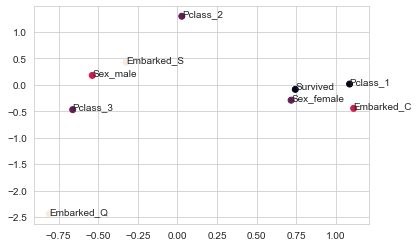

In [53]:
# Premier plan principal
col=[1,1,2,2,2,3,3,5,5]
plt.scatter(mca.fs_c()[:, 0],mca.fs_c()[:, 1],c=col)
for i, j, nom in zip(mca.fs_c()[:, 0],mca.fs_c()[:, 1], df.columns):
       plt.text(i, j, nom)
plt.show()

## 2e methode
https://github.com/esafak/mca/blob/master/docs/usage.rst

In [54]:
import mca
mca_df = mca.MCA(df)
# Valeurs singulières
print(mca_df.fs_r(1)) # 1 = 100%, meaning preserve all variance.)

[[ 0.0240688   0.19088419  0.40506974 -0.13877227  0.20991266]
 [-0.24377268 -0.25857328 -0.40707802 -0.03029652  0.02738647]
 [-0.09968166  0.08272989 -0.21369041  0.1709141   0.05921346]
 ...
 [ 0.42485672 -0.03301554  0.13013967  0.07599187  0.0247472 ]
 [ 0.42485672 -0.03301554  0.13013967  0.07599187  0.0247472 ]
 [-0.46356739  0.06607893  0.58133946 -0.16741012 -0.02080113]]


Les valeurs propres, ou inerties principales, des facteurs :

In [55]:
print(mca_df.L)

[0.13279279 0.07565164 0.05834636 0.01684788 0.00963781]


L'inertie est simplement la somme des inerties de principales :

In [56]:
print(mca_df.inertia, mca_df.L.sum())

0.2932764798881712 0.2932764798881712


Si la correction de Benzecri a été activée (par défaut), cette valeur est inférieure à la somme quadratique des valeurs singulières :

In [57]:
print(mca_df.s)
print(sum(mca_df.s**2))

[6.59567168e-01 5.96320890e-01 5.70808325e-01 4.75907896e-01
 4.45393575e-01 2.80814886e-01 1.57511727e-16 1.06682199e-16
 8.65603068e-17]
1.620170357475558


La correction de Benzecri plus le seuillage a permis d'éliminer 3 des 6 colonnes. Vous pouvez ajuster le seuil en fixant le paramètre TOL (par défaut : 1e-4) dans le constructeur. Si nous n'avions pas fixé le paramètre prob de fs_r() à 1, il aurait utilisé sa valeur par défaut de 0,9 et nous aurions éliminé deux autres colonnes, ce qui aurait donné un rapport de réduction de la dimensionnalité de 6:1.

In [58]:
print(mca_df.fs_r())

[[ 0.0240688   0.19088419  0.40506974]
 [-0.24377268 -0.25857328 -0.40707802]
 [-0.09968166  0.08272989 -0.21369041]
 ...
 [ 0.42485672 -0.03301554  0.13013967]
 [ 0.42485672 -0.03301554  0.13013967]
 [-0.46356739  0.06607893  0.58133946]]


Le résultat est identique à la première colonne de l'invocation précédente de fs_r(1). Ceci est valable en général ; réduire prob ou N tronque simplement la matrice, exactement comme dans l'ACP. 

In [59]:
# Composantes principales des colonnes (modalités)
print(mca_df.fs_c())

[[-0.41073133  0.04034822 -0.16668076]
 [-0.59991833 -0.0061874   0.34118348]
 [-0.01518269 -0.59702029 -0.40221422]
 [ 0.36496812  0.21708455  0.03933481]
 [-0.39617468  0.13474851 -0.33101213]
 [ 0.29674562 -0.08130109  0.21306658]
 [-0.61408878  0.20570123  0.44125016]
 [ 0.4465976   1.12615172 -0.4680659 ]
 [ 0.17895088 -0.19484704 -0.02954697]]


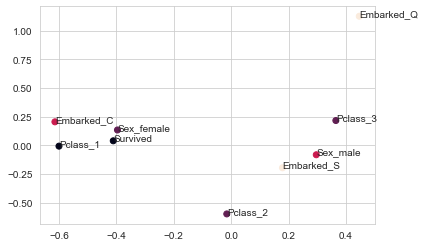

In [60]:
# Premier plan principal
col=[1,1,2,2,2,3,3,5,5]
plt.scatter(mca_df.fs_c()[:, 0], mca_df.fs_c()[:, 1],c=col)
for i, j, nom in zip(mca_df.fs_c()[:, 0], mca_df.fs_c()[:, 1], df.columns):
       plt.text(i, j, nom)
plt.show()